## Data Analysis pipeline for all datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\welt.xlsx")
df

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible
0,welt,https://www.welt.de/reise/staedtereisen/articl...,"sp, ns, spo, schi, ss, rna",2023-12-11,2023-12-11,2024-10-20,NaN,NaN,"Italien, Laenderportraets, Genua, Staedteportr...",Stadtreise: In Ligurien liegt die grosse Unbek...,Touristisch spielt Genua nicht in derselben Li...,Touristisch spielt Genua nicht in derselben Li...,0.0,0.0,0.0,1.0
1,welt,https://www.welt.de/kmpkt/article233238485/Mys...,"schi, sp, ss, ns",2022-09-20,2022-09-20,2024-10-20,NaN,NaN,"Tiere, kmpkt, Evolution, Australien, Meerestie...","Mysterioese Seedrachen: Keine Zaehne, bizarre ...",Der Seedrache ist kein gewoehnlicher Fisch. Di...,Der Seedrache ist kein gewoehnlicher Fisch. Di...,0.0,0.0,0.0,1.0
2,welt,https://www.welt.de/iconist/partnerschaft/arti...,"ss, sp, ns, pandemie, schi, corona, rna",2023-09-22,2024-01-31,2024-10-20,NaN,NaN,"Parkin-Clark, Doerfer, Gaerten, Landwirtschaft...",Veronika Heilbrunner: Mit 20 haette ich mir eh...,Vor gut einem Jahr verliess Mode-Influencerin ...,Vor gut einem Jahr verliess Mode-Influencerin ...,0.0,0.0,1.0,1.0
3,welt,https://www.welt.de/wirtschaft/article24482236...,"sp, ns, spo, tesla, ss",2023-04-15,2023-04-18,2024-10-20,NaN,NaN,"Meyer-Laurin, Musk, Elon, Kuenstliche Intellig...",Elon Musk: Ploetzlich plant der Tech-Unternehm...,Elon Musk will offenbar ein eigenes KI-Unterne...,Elon Musk will offenbar ein eigenes KI-Unterne...,0.0,0.0,0.0,1.0
4,welt,https://www.welt.de/iconist/partnerschaft/arti...,"sp, feminismus, ns, spo, schi, demo, ss, leich...",2020-11-27,2020-11-27,2024-10-20,NaN,NaN,"Ihring-Silvia, Hexenglaube, Hexen, Social Medi...",WitchTok: Eine neue Generation Hexen hat sich ...,Eine neue Generation Hexen hat sich auf Social...,Eine neue Generation Hexen hat sich auf Social...,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,welt,https://www.welt.de/kmpkt/article244742914/Kal...,"sp, ss, ns",2023-06-26,2023-06-26,2024-10-20,NaN,NaN,"kmpkt, Tiefsee, Tiefseeexpeditionen, Kalmare, ...",Kalmar im Atlantik: Diese Kreatur erinnert an ...,"In der Tiefsee schwimmt eine Kreatur, die laut...","In der Tiefsee schwimmt eine Kreatur, die laut...",NaN,NaN,NaN,NaN
164,welt,https://www.welt.de/iconist/unterwegs/article2...,"sp, corona, lockdown, ns, spo, pandemie, ss",2023-12-12,2023-12-12,2024-10-20,NaN,NaN,"Hinrichs-Per, Dorfportraets, Kommunen, Rekorde...",Die zehn kuriosesten Doerfer Deutschlands - Ei...,"Mehrere Meter unter dem Meeresspiegel, tausend...","Mehrere Meter unter dem Meeresspiegel, tausend...",NaN,NaN,NaN,NaN
165,welt,https://www.welt.de/wirtschaft/article24486286...,"sp, ns, spo, tesla, schi, demo, ss",2023-04-18,2023-04-18,2024-10-20,NaN,NaN,"Newsteam, Kuenstliche Intelligenz (KI), Musk, ...",Tucker Carlson: Elon Musk will mit TruthGPT di...,Im TV Sender Fox News hat Elon Musk seine Plae...,Im TV Sender Fox News hat Elon Musk seine Plae...,NaN,NaN,NaN,NaN
166,welt,https://www.welt.de/iconist/maenner/article222...,"christ, sp, ns, homeoffice, ss",2020-12-26,2023-04-14,2024-10-20,NaN,NaN,"Herrenmode, Bekleidungsindustrie, Cassier-Phil...",Shaping new tomorrow: Diese Daenen machen Mode...,"Bequem, nachhaltig und stylish die Anprueche ...","Bequem, nachhaltig und stylish die Anprueche ...",NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [3]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News        0.0
Extreme bias     2.0
clickbait        9.0
credible        49.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   news_outlet          168 non-null    object        
 1   provenance           168 non-null    object        
 2   query_keywords       168 non-null    object        
 3   creation_date        168 non-null    datetime64[ns]
 4   last_modified        168 non-null    datetime64[ns]
 5   crawl_date           168 non-null    datetime64[ns]
 6   author_person        0 non-null      float64       
 7   author_organization  0 non-null      float64       
 8   news_keywords        168 non-null    object        
 9   content_title        168 non-null    object        
 10  content_description  168 non-null    object        
 11  content_body         168 non-null    object        
 12  Fake News            52 non-null     float64       
 13  Extreme bias         52 non-null   

plot of label distr

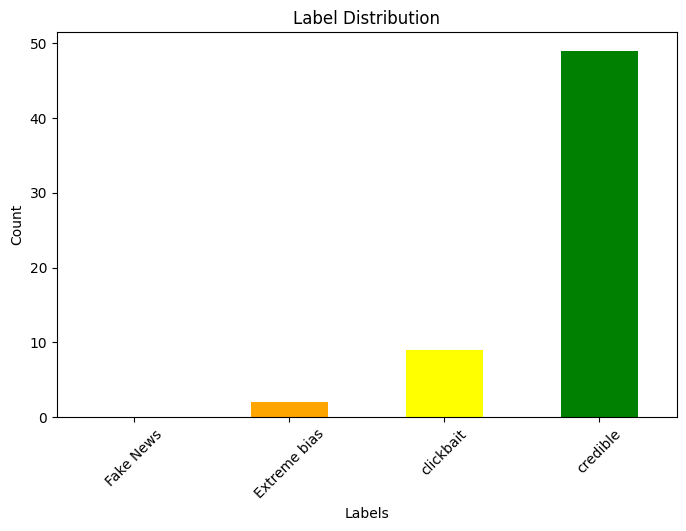

In [5]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

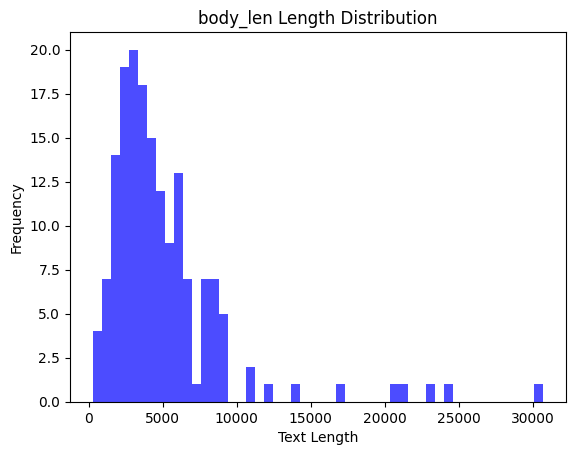

In [6]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

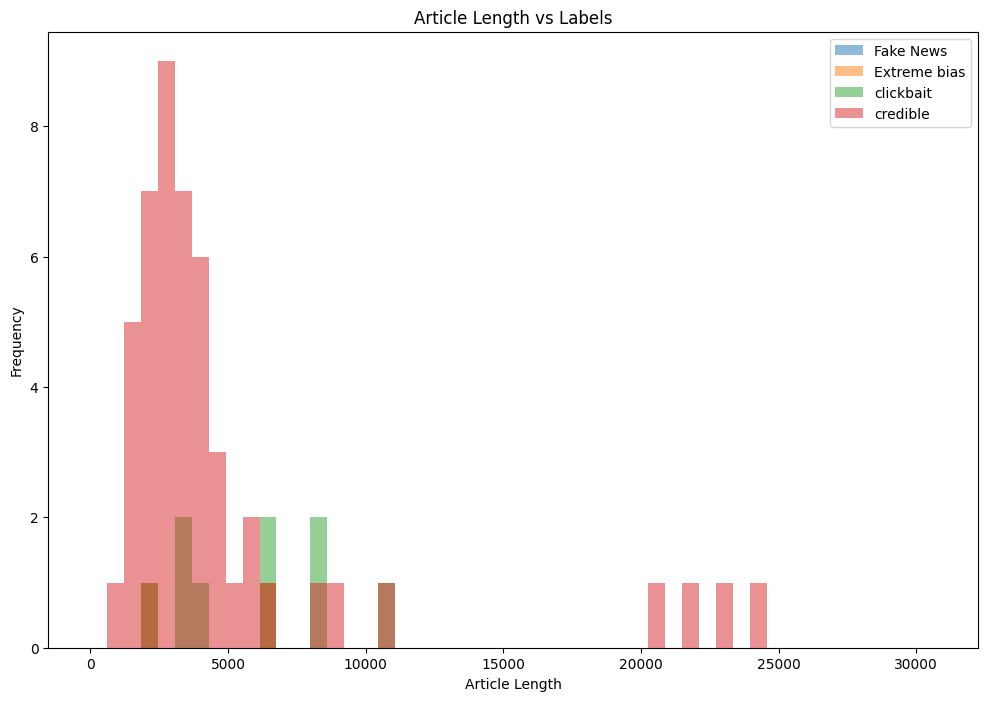

In [7]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize bodies

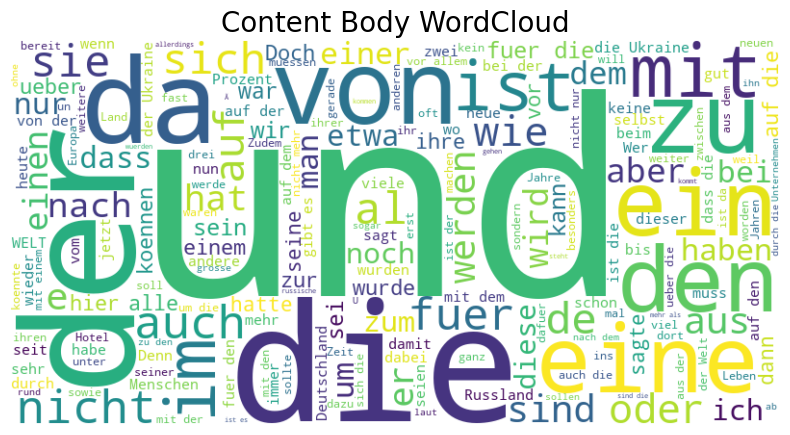

In [8]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Body WordCloud')

visualize titles

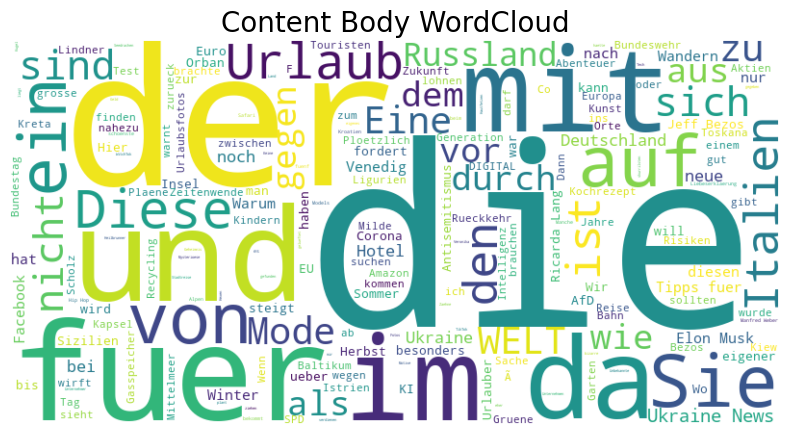

In [ ]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Titles WordCloud')

split df to labelled and not labelled

In [10]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 52 rows
Unlabelled Data: 116 rows


In [11]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
0,welt,https://www.welt.de/reise/staedtereisen/articl...,"sp, ns, spo, schi, ss, rna",2023-12-11,2023-12-11,2024-10-20,NaN,NaN,"Italien, Laenderportraets, Genua, Staedteportr...",Stadtreise: In Ligurien liegt die grosse Unbek...,Touristisch spielt Genua nicht in derselben Li...,Touristisch spielt Genua nicht in derselben Li...,0.0,0.0,0.0,1.0,4867,True
1,welt,https://www.welt.de/kmpkt/article233238485/Mys...,"schi, sp, ss, ns",2022-09-20,2022-09-20,2024-10-20,NaN,NaN,"Tiere, kmpkt, Evolution, Australien, Meerestie...","Mysterioese Seedrachen: Keine Zaehne, bizarre ...",Der Seedrache ist kein gewoehnlicher Fisch. Di...,Der Seedrache ist kein gewoehnlicher Fisch. Di...,0.0,0.0,0.0,1.0,3611,True
2,welt,https://www.welt.de/iconist/partnerschaft/arti...,"ss, sp, ns, pandemie, schi, corona, rna",2023-09-22,2024-01-31,2024-10-20,NaN,NaN,"Parkin-Clark, Doerfer, Gaerten, Landwirtschaft...",Veronika Heilbrunner: Mit 20 haette ich mir eh...,Vor gut einem Jahr verliess Mode-Influencerin ...,Vor gut einem Jahr verliess Mode-Influencerin ...,0.0,0.0,1.0,1.0,8217,True
3,welt,https://www.welt.de/wirtschaft/article24482236...,"sp, ns, spo, tesla, ss",2023-04-15,2023-04-18,2024-10-20,NaN,NaN,"Meyer-Laurin, Musk, Elon, Kuenstliche Intellig...",Elon Musk: Ploetzlich plant der Tech-Unternehm...,Elon Musk will offenbar ein eigenes KI-Unterne...,Elon Musk will offenbar ein eigenes KI-Unterne...,0.0,0.0,0.0,1.0,3843,True
4,welt,https://www.welt.de/iconist/partnerschaft/arti...,"sp, feminismus, ns, spo, schi, demo, ss, leich...",2020-11-27,2020-11-27,2024-10-20,NaN,NaN,"Ihring-Silvia, Hexenglaube, Hexen, Social Medi...",WitchTok: Eine neue Generation Hexen hat sich ...,Eine neue Generation Hexen hat sich auf Social...,Eine neue Generation Hexen hat sich auf Social...,0.0,0.0,1.0,0.0,8150,True


encode labels

In [12]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_37432\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [13]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
0,welt,https://www.welt.de/reise/staedtereisen/articl...,"sp, ns, spo, schi, ss, rna",2023-12-11,2023-12-11,2024-10-20,NaN,NaN,"Italien, Laenderportraets, Genua, Staedteportr...",Stadtreise: In Ligurien liegt die grosse Unbek...,Touristisch spielt Genua nicht in derselben Li...,Touristisch spielt Genua nicht in derselben Li...,0.0,0.0,0.0,1.0,4867,True,"[0, 0, 0, 1]"
1,welt,https://www.welt.de/kmpkt/article233238485/Mys...,"schi, sp, ss, ns",2022-09-20,2022-09-20,2024-10-20,NaN,NaN,"Tiere, kmpkt, Evolution, Australien, Meerestie...","Mysterioese Seedrachen: Keine Zaehne, bizarre ...",Der Seedrache ist kein gewoehnlicher Fisch. Di...,Der Seedrache ist kein gewoehnlicher Fisch. Di...,0.0,0.0,0.0,1.0,3611,True,"[0, 0, 0, 1]"
2,welt,https://www.welt.de/iconist/partnerschaft/arti...,"ss, sp, ns, pandemie, schi, corona, rna",2023-09-22,2024-01-31,2024-10-20,NaN,NaN,"Parkin-Clark, Doerfer, Gaerten, Landwirtschaft...",Veronika Heilbrunner: Mit 20 haette ich mir eh...,Vor gut einem Jahr verliess Mode-Influencerin ...,Vor gut einem Jahr verliess Mode-Influencerin ...,0.0,0.0,1.0,1.0,8217,True,"[0, 0, 1, 1]"
3,welt,https://www.welt.de/wirtschaft/article24482236...,"sp, ns, spo, tesla, ss",2023-04-15,2023-04-18,2024-10-20,NaN,NaN,"Meyer-Laurin, Musk, Elon, Kuenstliche Intellig...",Elon Musk: Ploetzlich plant der Tech-Unternehm...,Elon Musk will offenbar ein eigenes KI-Unterne...,Elon Musk will offenbar ein eigenes KI-Unterne...,0.0,0.0,0.0,1.0,3843,True,"[0, 0, 0, 1]"
4,welt,https://www.welt.de/iconist/partnerschaft/arti...,"sp, feminismus, ns, spo, schi, demo, ss, leich...",2020-11-27,2020-11-27,2024-10-20,NaN,NaN,"Ihring-Silvia, Hexenglaube, Hexen, Social Medi...",WitchTok: Eine neue Generation Hexen hat sich ...,Eine neue Generation Hexen hat sich auf Social...,Eine neue Generation Hexen hat sich auf Social...,0.0,0.0,1.0,0.0,8150,True,"[0, 0, 1, 0]"


we can drop, whatever we dont need, later

export data

In [14]:
labelled_df.to_csv('welt_labelled_data.csv', index=False)
unlabelled_df.to_csv('welt_unlabelled_data.csv', index=False)